# Simple Neural Network 

In today's lesson we will expand on the simple perceptron neural network to more advanced neural networks. 

These neural networks will work with different activation functions besides the simple heaveside activation function. 


## We will be working to train a network to identify handwritten numbers 

<img src="https://i0.wp.com/syncedreview.com/wp-content/uploads/2019/06/MNIST.png" style="height:450px">

# 1) Packages 


Let's first import all of the packages we need for this assignment. 

- [tensorflow](https://www.tensorflow.org/) is what we will use to build our neural networks 

- [matplotlib](https://matplotlib.org/) helps to plot data and visualize the data

- [numpy](https://numpy.org/) helps us make our training and test set arrays

- [keras](https://keras.io/) helps us to make our neural networks 



In [3]:
#Author: Leila Abdelrahman 
#Adapted from the Classify Images of Clothing Website by François Chollet, 2017, MIT

from __future__ import absolute_import, division, print_function, unicode_literals
# -*- coding: utf-8 -*-




#Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))






1.15.0
Device mapping:



# Import the MNIST dataset 

In [4]:


mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#Loading the dataset should return 4 NumPy arrays

#Next, add class name labels, as these are not included with the datast. Stoer them in an
#array for later as we plot the images
class_names =  ['0', '1', '2' , '3', '4', '5', '6', '7', '8', 
               '9']

# Look at dataset parameter

In [5]:
#Look at the parameters of the dataset

#The data set contains 60,000 images in the training set, each represented as 28*28 poxels
print(train_images.shape)





(60000, 28, 28)


In [6]:
#There are 60,000 traning labels 
len(train_labels)

60000

In [7]:
#Each label has an integer between 0 and 9;
print(train_labels)


[5 0 4 ... 5 6 8]


In [8]:
#Thee are 10,000 images in the test set, each 28*28 pixels
print(test_images.shape)

(10000, 28, 28)


# Data before normalization

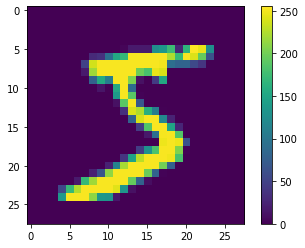

In [9]:
#Preprocess the data so that we can normalize the pixel values between a range of 0 and 1. 
#Normalization helps with training accuracy 
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Normalize the data by dividing by largest pixel value 

In [10]:
#We now want to scale the values. Do this by dividing by 255, hwhich is the largest pixel value 

train_images = train_images/255.0
test_images = test_images/255.0


# Look at new normalized pictures

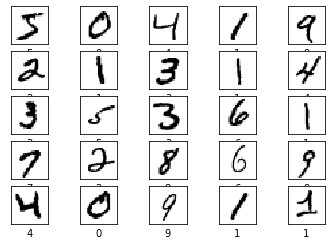

In [11]:
#Verify that the data is in the correct format and that it is standardized 

for i in range (25):
    plt.rcParams.update({'font.size': 10})
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

# Build the model. 

## Every neural network is composed of layers. Each layer repreents extracting  representations from the data fed into them. 

- This neural network has 3 layers. 
- The first layer (Flatten), transforms the image data from a 2d array to a 1d array
- The second layer is a Dense function (a densly connected neural layer, which as 128 nodes, or neurons) 
- The last layer has 10 nodes, and uses the softmax activation function. 

Softmax activation functions return probability scores  tht sum to 1. MAKE SURE THE NUMBER OF NODES IN THE LAST LAYER IS EQUAL TO THE NUMBER OF CLASSES. 

In [12]:


model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)) ,
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Let's look at the anatomy of the model. This outlines what each layer is, and how many parameters (arguments) there are. 

In [13]:


print(model.summary())



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


## Now let's look at the weight array, as well as the biases

- A weight is used to ascribe importance to each node. The higher the node, the more 'imporant' it is in the network 

- A bias is like the intercept added to a linear equation. It adds and additional parameter. The default is that the bias is 0. 

- For the weights and biases, you will see the weights and biases for the first layer and the last layer of the network 

- Weights are normalized from -1 to 1. 

In [14]:


print(model.get_weights())


[array([[ 0.05862226,  0.05439245, -0.06823616, ..., -0.00067226,
         0.00814962,  0.05306532],
       [-0.0788167 , -0.04290105,  0.07634839, ...,  0.07309855,
         0.03719987, -0.03447789],
       [ 0.00658854,  0.07685014, -0.03402682, ..., -0.05293852,
         0.01014719,  0.02989452],
       ...,
       [-0.00936144,  0.04284317,  0.07502908, ..., -0.00403795,
         0.05942462, -0.02038234],
       [ 0.05614058, -0.02771735, -0.06578773, ...,  0.00561351,
        -0.0474937 ,  0.01857032],
       [ 0.01892995,  0.00148522,  0.06771729, ...,  0.06086548,
         0.01782785,  0.04673313]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

# Complile the model with optimizer, loss, and metrics 

- Loss function: steers the model in the right direction. Loss is calculated by how accurate the model is at classifying
- Optimizer: the model uses an optimization funcition to minizmize the loss function
 - Metrics: Records accuracy of how well the model correctly classifies the images

In [15]:


model.compile(optimizer = 'adam' , 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy'])

# Train the model

- Step 1: feed the training data to the model. In this case it is the train_images and train_labels arrays
- Step 2: Model learns over a series of epochs. Each epoch represents one "step" in the learning process
- Step 3" Ask the model to make predictions about the test set. 


In [16]:


model.fit(train_images, train_labels, epochs = 10)

#This model is about 85% accurate on the training data. Increasing the number of epochs increases accuracy,
#but increases computing time.

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2599 - acc: 0.92620s - loss: 0.2667 - acc: 0.9
Epoch 2/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1120 - acc: 0.9673
Epoch 3/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0773 - acc: 0.9762
Epoch 4/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0582 - acc: 0.9822
Epoch 5/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0447 - acc: 0.9861
Epoch 6/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0354 - acc: 0.9892
Epoch 7/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0284 - acc: 0.9910
Epoch 8/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0237 - acc: 0.9930
Epoch 9/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0187 - acc: 0.9941
Epoch 10/10
60000/60000 [======

# Now test the model on the test set and evaluate accuracy 

You will notice that the test accuracy is less than the training accuracy. This difference represents overfitting


In [17]:


test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc)



10000/10000 - 0s - loss: 0.0809 - acc: 0.9779

Test accuracy: 0.9779


# Lets look at how the model thinks by making predictions 
- The ten numbers represent probabilties of the image beloning to a certain class
- Each number represents the model's 'confidence that an image belongs to that class'

In [18]:



predictions = model.predict(test_images)

print(predictions[0])

#Print the label with the highest confidence value 
print('Highest Confidence Label:', np.argmax(predictions[0]))

#Compare this with the model's actual test label 
print('Test Label:', test_labels[0])

[5.4973553e-11 3.7581041e-12 5.3383542e-10 2.2253405e-06 2.5375283e-14
 3.6402777e-12 2.1718150e-16 9.9999762e-01 1.8281885e-09 7.4876816e-08]
Highest Confidence Label: 7
Test Label: 7


# Let's graph the confidence levels as function of class label 

In [19]:


def plot_image(i , predictions_array, true_label, img) : 
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label: 
        color = 'blue'
    else : 
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
    
def plot_value_array(i, predictions_array, true_label) :
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array , color = "#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
        
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
        

# Look at the first  and 12th image, predictions and predictions array 

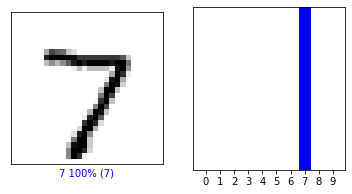

In [20]:


i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i , predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i] , test_labels)
plt.show()


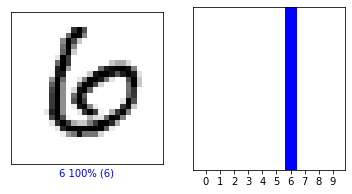

In [21]:
#Now lets look at the 12 image 

i = 11 
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i , predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i] , test_labels)
plt.show()


# Now let's plot several images with their predictions 

Correct predictions are in blue. Incorrect predictions are in red.


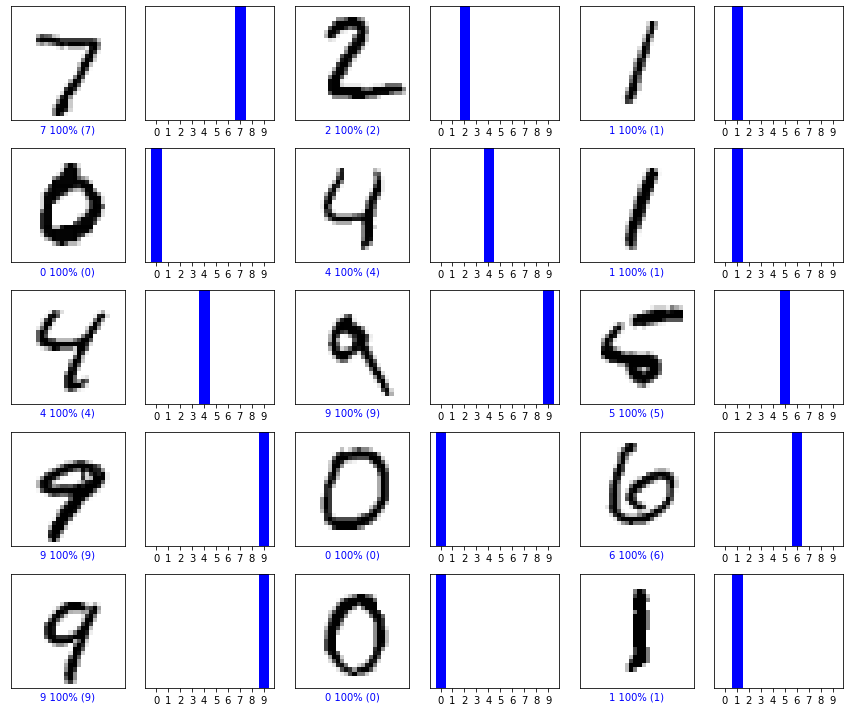

In [22]:
#Now let's plot several images with their predictions 
#Correct predictions are in blue. Incorrect predictions are in red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images) :
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
